![alt text](/home/yt/datascience/The-circumplex.ppm.png "circumplex")

## Valence-Arousal Prediction Audio and Visual Features

The Mediaeval 2017 Emotional Impact of Movies Task includes the data in the emotional domain 
(valence - arousal  regression) and  fear ( binary classification).
We have displayed the valence and arousal of all the movies in the dataset.
Also the time of the movie where fear is present is specified with the value of the second.
According to the Russell's circumplex model we were expectinf the "FEAR" to be appeared in the negative vallence, positive arousal part of the circumflex.
However in some movies, we can see that frightment exists in positive valence with negative arousal also.


In [1]:

import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import matplotlib.colors as colors


import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

import numpy as np
import pylab as pl
import re, fileinput
import os.path
import glob
import pickle
import sys


In [2]:
import numpy as np 
print np.__version__ 
print np.__path__


1.13.1
['/home/yt/anaconda2/lib/python2.7/site-packages/numpy']


In [3]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
from scipy.stats import pearsonr


In [4]:
med2017visualFeaturesfolder='/home/yt/Desktop/med2017/2017/MEDIAEVAL17-DevSet-Visual_features/MEDIAEVAL17-DevSet-Visual_features/features/'
med2017audiofolder='/home/yt/Desktop/med2017/2017/MEDIAEVAL17-DevSet-Audio_features/features/'
med2017annotationsFolder = '/home/yt/Desktop/med2017/2017/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/annotations/'
med2017fearFolder = '/home/yt/Desktop/med2017/2017/MEDIAEVAL17-DevSet-Fear-annotations/annotations/'
med2017dataFolder='/home/yt/Downloads/continuous-movies/data/'

In [5]:
med2017visualFeaturesfolderTest='/home/yt/Desktop/med2017/2017/MEDIAEVAL17-TestSet-Visual_features/visual_features/'
med2017audiofolderTest = '/home/yt/Desktop/med2017/2017/MEDIAEVAL17-TestSet-Audio_features/audio_features/'
med2017datafolderTest = '/home/yt/Downloads/continuous-test/data/'


In [6]:
files = glob.glob(med2017datafolderTest+'*')
testmovieNames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [7]:
files = glob.glob(med2017dataFolder+'*')
movieNames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [8]:
movieNames,testmovieNames

(['After_The_Rain',
  'Attitude_Matters',
  'Barely_legal_stories',
  'Between_Viewings',
  'Big_Buck_Bunny',
  'Chatter',
  'Cloudland',
  'Damaged_Kung_Fu',
  'Decay',
  'Elephant_s_Dream',
  'First_Bite',
  'Full_Service',
  'Islands',
  'Lesson_Learned',
  'Norm',
  'Nuclear_Family',
  'On_time',
  'Origami',
  'Parafundit',
  'Payload',
  'Riding_The_Rails',
  'Sintel',
  'Spaceman',
  'Superhero',
  'Tears_of_Steel',
  'The_room_of_franz_kafka',
  'The_secret_number',
  'To_Claire_From_Sonny',
  'Wanted',
  'You_Again'],
 ['MEDIAEVAL17_00',
  'MEDIAEVAL17_01',
  'MEDIAEVAL17_02',
  'MEDIAEVAL17_03',
  'MEDIAEVAL17_04',
  'MEDIAEVAL17_05',
  'MEDIAEVAL17_06',
  'MEDIAEVAL17_07',
  'MEDIAEVAL17_08',
  'MEDIAEVAL17_09',
  'MEDIAEVAL17_10',
  'MEDIAEVAL17_11',
  'MEDIAEVAL17_12',
  'MEDIAEVAL17_13'])

In [9]:
groups = {
    0:['Decay'],
    1:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    2:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    3:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    4:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    5:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    6:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload']
}

def gettraintestmovielist(groupno):
    testlist = groups[groupno]
    trainlist =[]
    for idx, group in enumerate(groups):
        if idx != groupno:
            for g in groups[idx]:
                trainlist.append(g)
    return trainlist, testlist

## Valence - Arosal Annotations
Thank you for downloading LIRIS-ACCEDE dataset.
This file contains valence/arousal annotations for the LIRIS-ACCEDE continuous part that is used for the first subtask of the MEDIAEVAL 2017 Emotional Impact of Movies task.
For each of the 30 movies, consecutive ten seconds-segments sliding over the whole movie with a shift of 5 seconds are considered and provided with valence and arousal annotations.
Each txt file contains 4 columns separated by tabulations. The first column is the segment id, starting from 0, the second column is the starting time of the segment in the movie and the third and fourth columns are respectively the valence and arousal values for this segment.

In [10]:
def getAnnotationDf(movname,folder=med2017annotationsFolder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-valence_arousal.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

In [11]:
df = getAnnotationDf(movieNames[0])
#df.hist(alpha=0.5,bins=50)

In [12]:
#df.head()
#df.describe()

## Valence, Arousal histogram plots for Dev-Set

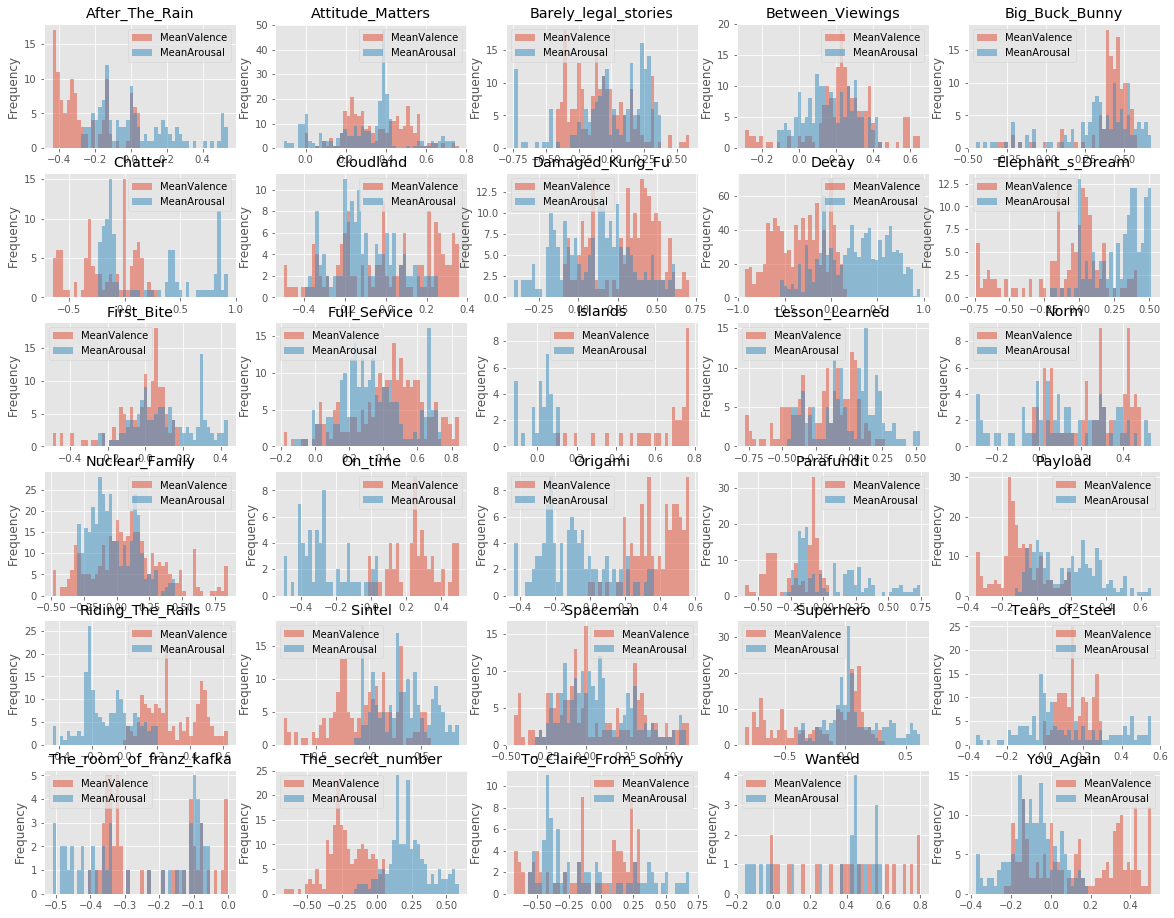

In [13]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot.hist(ax=plt.gca(),title=mov,alpha=0.5,bins=50)

## Valence , Arousal plots for Dev-Set

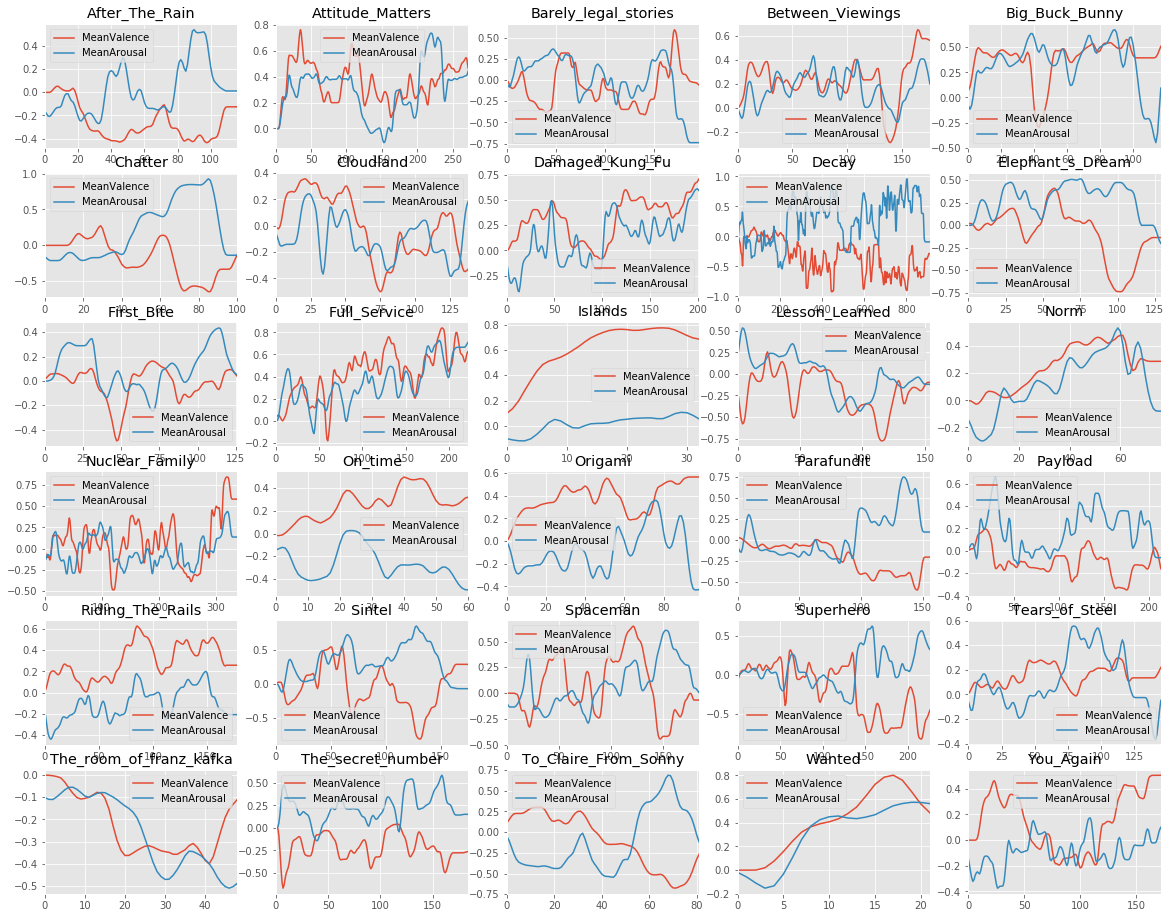

In [166]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    #.hist(alpha=0.5,bins=50)


## Fear Annotations

In [14]:
def getFearDf(movname):
    filename = os.path.join(med2017fearFolder, movname + '-MEDIAEVAL2017-fear.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df


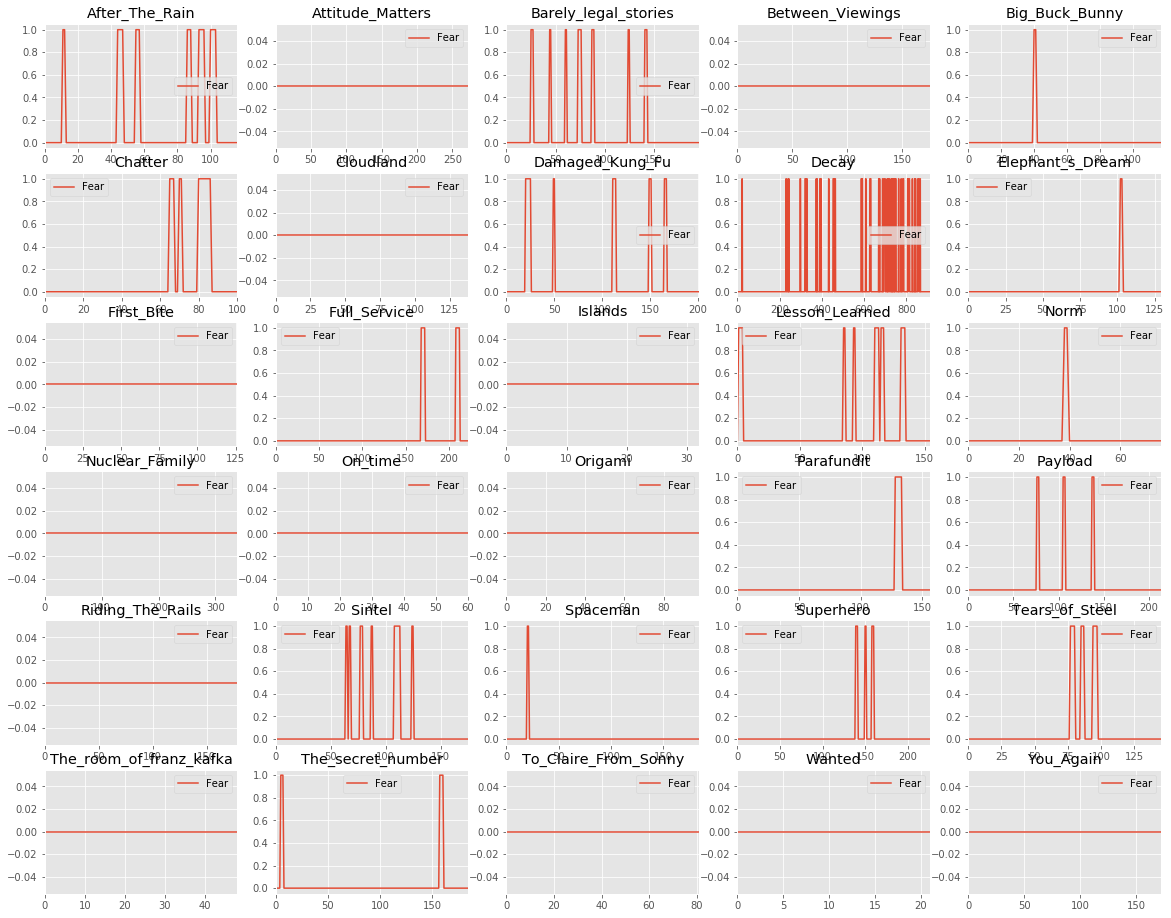

In [18]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getFearDf(mov)
    df[['Fear']].plot(ax=plt.gca(),title=mov)

## Audio Features


In [15]:
def getAudioDf(moviename,folder=med2017audiofolder):
    if 'TestSet' in folder:
        files = glob.glob(folder+moviename+'/audio_features/*.csv')
    else:
        files = glob.glob(folder+moviename+'/*.csv')
    files = sorted(files)
    files
    alist = []
    for fname in files:
        f=open(fname,'r')
        h = []
        for l in f :
            if '@attribute' in l:
                h.append(l.split()[1])
            elif l == '\n':
                l
            elif l[0] =='@':
                l
            else:
                alist.append(map(float,l.split(',')[1:])) #first attribute is string ,skipped
        f.close()
    
    return pd.DataFrame(alist,columns=h[1:])

## Visual Features

In [16]:
visual_feat = ['acc', 'cedd', 'cl', 'eh', 'fc6', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
visual_feat_wofc16 = ['acc', 'cedd', 'cl', 'eh', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [17]:
def getVisFeatureDf(moviename,typename):
    files = glob.glob(med2017visualFeaturesfolder+moviename+'/'+typename+'/*.txt')
    files = sorted(files)
    alist = []
    for fname in files:
        f=open(fname,'r')
        for l in f:
            alist.append(map(float,l.split(',')))
        f.close()
    return pd.DataFrame(alist)

def getAvgVisFeatureDf(moviename,typename):
    df = getVisFeatureDf(moviename,typename)
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    return dfwindow

def getAvgVisFeatListDf(moviename,featlist):
    df = getVisFeatureDf(moviename,featlist[0])
    for feat in featlist[1:]:
        tdf = getVisFeatureDf(moviename,feat)
        df = pd.concat([df,tdf],axis=1)
    
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    dfwindow.columns=list(range(len(dfwindow.columns)))
    return dfwindow

In [18]:
sum([len(getAnnotationDf(m)) for m in movieNames ])

5274

In [19]:
sum([len(getAudioDf(m)) for m in movieNames ])

5264

In [20]:
sum([len(getVisFeatureDf(m,'cl')) for m in movieNames ])

26589

In [21]:
sum([len(getAvgVisFeatureDf(m,'cl')) for m in movieNames ])

5271

In [113]:
df = getVisFeatureDf(movieNames[0],'cl')
df = getAvgVisFeatureDf(movieNames[0],'cl')
df = getAvgVisFeatListDf(movieNames[0],['cl','eh'])
#df.hist()

## Train and Test set creation

In [22]:
def getFeatureswAnnotationsDf(movieNames,featlist):
    Xv = getAvgVisFeatListDf(movieNames[0],featlist)
    Xa = getAudioDf(movieNames[0])
    y = getAnnotationDf(movieNames[0])[['MeanValence','MeanArousal']]
    
    mlen = min(len(Xv),len(Xa),len(y))
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    y = y[:mlen]
    
    for mov in movieNames[1:]:
        tXv = getAvgVisFeatListDf(mov,featlist)
        tXa = getAudioDf(mov)
        ty = getAnnotationDf(mov)[['MeanValence','MeanArousal']]
        
        mlen = min(len(tXv),len(tXa),len(ty))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        ty = ty[:mlen]
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        y  = y.append(ty)
        
    return Xv,Xa,y

In [23]:
def getMovListAudioVisFeatListwAnnotationsDf(movieNames,featlist):
    Xv = getAvgVisFeatureDf(movieNames[0],featlist[0])
    Xa = getAudioDf(movieNames[0])
    y = getAnnotationDf(movieNames[0])[['MeanValence','MeanArousal']]
    
    mlen = min(len(Xv),len(Xa),len(y))
    print(mlen)
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    y = y[:mlen]
    
    for feattype in featlist[1:]:
        fXv = getAvgVisFeatureDf(movieNames[0],feattype)[:mlen]
        Xv = pd.concat( [Xv,fXv], axis=1 )

    for mov in movieNames[1:]:
        tXv = getAvgVisFeatureDf(mov,featlist[0])
        tXa = getAudioDf(mov)
        ty = getAnnotationDf(mov)[['MeanValence','MeanArousal']]
        
        mlen = min(len(tXv),len(tXa),len(ty))
        print(mlen)
        
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        ty = ty[:mlen]
        
        for feattype in featlist[1:]:
            fXv = getAvgVisFeatureDf(mov,feattype)[:mlen]
            tXv = pd.concat( [tXv,fXv], axis=1 )
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        y  = y.append(ty)
        
    return Xv,Xa,y

In [24]:
tXv,tXa,ty = getFeatureswAnnotationsDf(movieNames,visual_feat_wofc16)
tXv.shape,tXa.shape,ty.shape

((5264, 1271), (5264, 1583), (5264, 2))

In [25]:
trainlist, testlist=gettraintestmovielist(1)  # index 1 olanları test , diğerlerini train yapan fonksiyon
trainlist, testlist

(['Decay',
  'Cloudland',
  'Origami',
  'Riding_The_Rails',
  'Tears_of_Steel',
  'Sintel',
  'On_time',
  'Elephant_s_Dream',
  'Norm',
  'Big_Buck_Bunny',
  'Chatter',
  'Full_Service',
  'Islands',
  'To_Claire_From_Sonny',
  'Nuclear_Family',
  'After_The_Rain',
  'Parafundit',
  'The_room_of_franz_kafka',
  'Attitude_Matters',
  'Lesson_Learned',
  'Superhero',
  'First_Bite',
  'Wanted',
  'Between_Viewings',
  'Barely_legal_stories',
  'Payload'],
 ['You_Again', 'Damaged_Kung_Fu', 'The_secret_number', 'Spaceman'])

In [26]:
tXv,tXa,ty = getFeatureswAnnotationsDf(trainlist,visual_feat_wofc16)
tXv.shape,tXa.shape,ty.shape

((4521, 1271), (4521, 1583), (4521, 2))

In [27]:
testXv, testXa, testy = getFeatureswAnnotationsDf(testlist,visual_feat_wofc16)
testXv.shape, testXa.shape, testy.shape

((743, 1271), (743, 1583), (743, 2))

In [175]:
#tXv,tXa,ty = getMovListAudioVisFeatListwAnnotationsDf(movieNames,['cl','gabor'])
#tXv.shape,tXa.shape,ty.shape

In [28]:
X_train, X_test, y_train, y_test = train_test_split(tXv, ty,test_size=0.32, random_state=0)

Xa_train, Xa_test, ya_train, ya_test = train_test_split(tXa, ty,test_size=0.2, random_state=0)


In [29]:
y_train.head()

,MeanValence,MeanArousal
779,-0.614886,0.617904
138,-0.190199,-0.092506
890,-0.368990,-0.090817
120,0.421316,-0.072652
796,-0.853115,0.754119


In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [1,2,3,5,10,50,100]},
    {'classifier': [GradientBoostingRegressor(max_depth=50)],
     'preprocessing': [None], 'regressor__n_estimators': [10, 50, 100,1000]}
]

grid = GridSearchCV(pipe, param_grid, cv=5,n_jobs=8)
grid.fit(X_train,y_train[['MeanValence']])

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
grid.grid_scores_, grid.best_params_, grid.best_score_

/home/yt/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yt/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yt/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yt/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,